# 3 Виконання

## 3.1 Повторити дії описані в пункті «Часові ряди і проста лінійна регресія частина 2» даної лабораторної роботи та порівняти з результатом попередньої лабораторної роботи.

### Завантажимо дані з ave_hi_nyc_jan_1895-2018.csv у датафрейм. Переназвемо колонки та застосуємо цілочисельне ділення, поділивши значенння років на 100.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
nyc = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
...,...,...,...
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4


*Завантаження датасету*

### Розіб'ємо дані на навчальні та тестові. Оскільки оцінювачі scikit-learn вимагають, щоб в якості навчальних і тестових даних використовувалися двовимірні масиви, то застосуємо метод reshape та передамо в нього значення -1, 1б щоб перетворити їх з одновимірного масиву з n елементами в двовимірний масив з n рядками і одним стовпцем.

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1),
    nyc.Temperature.values,
    random_state=11)

*Розбиття даних для навчання і тестування*

### Для перевірки пропорції навчальних і тестових даних (75% до 25%) задамо розміри X_train і X_test.

In [113]:
x_train.shape, x_test.shape

((93, 1), (31, 1))

*Роміри навчальних і тестових даних (75% до 25%)*

### За допомогою оцінювача LinearRegression та простої лінійної регресії, що  окремим випадком множинної лінійної регресії, навчимо модель. 

In [114]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=x_train, y=y_train)

LinearRegression()

*Тренування моделі*

### Виведемо кут нахилу, який зберігається в атрибуті coeff_ оцінювача.

In [115]:
linear_regression.coef_

array([0.01939167])

*Кут нахилу*

### Виведемо точку перетину, яка зберігається в атрибуті intercept_ оцінювача (m у формулі).

In [116]:
linear_regression.intercept_

-0.30779820252656265

*Точка перетину*

### Проведемо тестування моделі за даними з X_test і перевіримо прогнози по набору даних, виводячи прогнозовані і очікувані значення для кожного п'ятого елементу. 

In [117]:
predicted = linear_regression.predict(x_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected {e:.2f}')

predicted: 37.86, expected 31.70
predicted: 38.69, expected 34.80
predicted: 37.00, expected 39.40
predicted: 37.25, expected 45.70
predicted: 38.05, expected 32.30
predicted: 37.64, expected 33.80
predicted: 36.94, expected 39.70


*Тестування моделі*

### За допомогою кута нахилу і точки перетину зробимо прогнози для середньої температури в січні 2019 року, а також оцінки середньої температури в січні 1890 року.

In [118]:
m = linear_regression.coef_
b = linear_regression.intercept_
predict = lambda x: m * x + b

*Лямбда вираз формули y = mx + b*

### Спрогнозуємо значення за 2019 рік.

In [119]:
predict(2019)

array([38.84399018])

*Прогноз на 2019 рік*

### Спрогнозуємо значення за 1890 рік.

In [120]:
predict(1890)

array([36.34246432])

*Прогноз на 1890 рік*

### Візуалізуємо набір даних з регресійними прямими.

### Почнемо зі створення масиву, що містить мінімальні і максимальні значення дати з nyc.Date. Вони стануть координатами x початкової і кінцевої точок регресійної прямої.

In [121]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
x

array([1895, 2018])

*Масив даних*

### Передамо масив x функції predict та отримаємо пронозовані значення, які будуть використовуватися в якості координат y.

In [122]:
y = predict(x)
y

array([36.43942269, 38.82459851])

*Спрогнозовані значення*

 ### Побудуємо діаграму розкиду даних за допомогою функції scatterplot бібліотеки Seaborn і функції plot бібліотеки Matplotlib. Для виведення точок даних скористаємося методом scatterplot з колекцією DataFrame з ім'ям nyc. Змінимо масштаб осі. Зобразимо регресію.

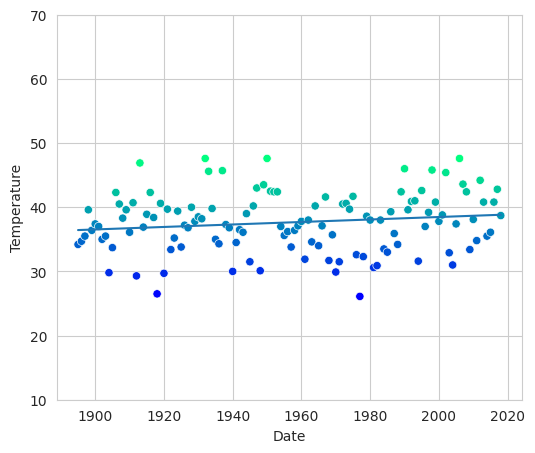

In [135]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.scatterplot(data=nyc, x='Date', ax=ax,
                y='Temperature', hue='Temperature',
                palette='winter', legend=False)
ax.set_ylim(10, 70)
ax.plot(x, y)

*Візуалізація з допомогою LinearRegression*

### Поглянемо на візуалізацію з минулої лабораторної та переконаємося, що обидві ідентичні.

(10.0, 70.0)

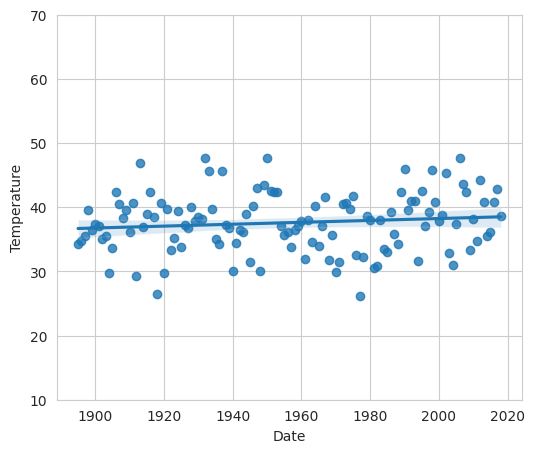

In [137]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.regplot(x=nyc.Date, y=nyc.Temperature, ax=ax)
ax.set_ylim(10, 70)

*Візуалізація минулої лабораторної*

### Як бачимо, візуалізації практично ідентичні.

## Аналогічно з прикладом з лекції 7 згенеруйте набір даних та класифікуйте його використавши класифікатор SVC (слайд 95)

### Для початку імпортуємо ListedColormap з matplotlib.colors та класифікатор SVC з sklearn.svm.

In [125]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

*Імпортування модулів*

### За допомогою бібліотеки NumPy згенеруємо набір даних, передавши початковий seed 1 та використавши функції np.random.randn( згенерує матрицю з 200-ми рядками та 2-ма стовпцями ), np.logical_xor( застосовує операцію виключного або ), np.where( приймає в себе логічну операцію xor та повертає значення 1, якщо True, -1, якщо False).

In [126]:
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0, x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

*Генерація даних*

### Зобразимо згенеровані дані. За допомогою функції scatter, спочатку синіми хрестиками зобразимо ті точки, для яких y_xor == 1. Потім ті точки, для яких y_xor == -1. Значення 0 та 1 у других індексах - це відповідно порядкові номери стовпчиків.

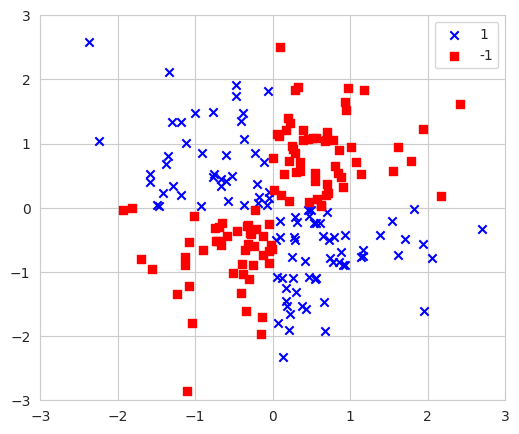

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')
ax.scatter(x_xor[y_xor == -1, 0], x_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.legend(loc='best')

*Візуалізація згенерованих даних*

### Запишемо функцію plot_decision_regions, яка приймає в параметри: X - двовимірний масив аргуметів, y - одновимірний масив значень, test_idx=None - тестовий індекс, resolution=0.02 - масштаб.

### Рефактиремо функцію, надану в лекції. "unq" - масив унікальних значень "y", а "unql" - довжина "unq".

### Викличемо IndexError, якщо передані масиви "markers" або "colors" менші за разміром ніж "unq".

### cmap - екземпляр класу ListedColormap, у який ми передали кольори до індекса "unql"; x1_min, x1_max - відповідно мінімальне і максимальне значення значення першого стовпчика, зміщені на 1 для кращої видимості; x2_min, x2_max - для другого стовпчика відповідно.

### xx1, xx2 - масиви рівномірно розподілених значень між мінімальним та максимальним з кроком в resolution за допомогою функції numpy.arange; xx1, xx2 - це перетворені попередні xx1 та xx2 за допомогою функції numpy.meshgrid, яка робить сітку індексів з одновимірних масивів; xx1_flat, xx2_flat - сплющені до одновимірних двовимірні масив xx1, xx2 за допомогою методу ravel; xx_t - матриця, стовпчиками якої є xx1_flat та xx2_flat.

### z - спрогнозовані класифікатором значення, у метод predict якого передаємо xx_t.

### За допомогою plt.contourf зображаємо контури класів, передаючи у функцію xx1, xx2 та кольорову мапу. За допомогою xlim та ylim, у які передаємо мінімальні та максимальні значення, обмежуємо візуалізацію для зручного сприйняття.

### У циклі для кожного класу вимальовуємо свої точки, передаючи у функцію scatter їхню позицію, колір, маркер, кольор контуру, позначку.

### Якщо тестовий індекс не пустий, то вимальовуємо точки з x_test.

In [148]:
def plot_decision_regions(x, y, classifier, markers, colors, w, h,
                          test_idx=None, resolution=0.02):
    unq = np.unique(y)
    unql = len(unq)
    if len(markers) < unql or len(colors) < unql:
        raise IndexError
    fig, ax = plt.subplots(1, 1, figsize=(w, h))
    cmap = ListedColormap(colors[:unql])
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1 = np.arange(x1_min, x1_max, resolution)
    xx2 = np.arange(x2_min, x2_max, resolution)
    xx1, xx2 = np.meshgrid(xx1, xx2)
    xx1_flat, xx2_flat = xx1.ravel(), xx2.ravel()
    xx_t = np.array([xx1_flat, xx2_flat]).T
    z = classifier.predict(xx_t)
    z = z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    for idx, c1 in enumerate(unq):
        params = dict(c=colors[idx], marker=markers[idx], label=c1,
                      edgecolor='black')
        ax.scatter(x=x[y == c1, 0], y=x[y == c1, 1], **params)
    if not test_idx:
        return ax
    params = dict(marker='o', edgecolor='black', s=100)
    x_test = x[test_idx, :]
    ax.scatter(x_test[:, 0], x_test[:, 1], **params)
    return ax


*Функція plot_decision_regions*

/tmp/ipykernel_43616/1281675792.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x[y == c1, 0], y=x[y == c1, 1], **params)


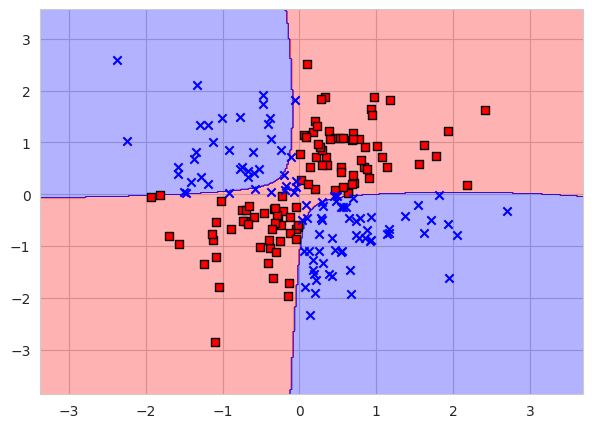

In [149]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10)
svm.fit(x_xor, y_xor)
ax = plot_decision_regions(x_xor, y_xor, svm, markers, colors, 7, 5)

*Візуалізація роботи класифікатора SVC*

## Порівняти декілька класифікаційних оцінювачів наприклад KNeighborsClassifier, SVC та GaussianNB для вбудованого в scikit-learn одного набору даних (вибрати довільний за бажанням)

### Обиремо датасет вин та виведемо його.

In [188]:
from sklearn.datasets import load_wine
pd.options.display.max_rows = 7
pd.options.display.max_columns = 7
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,...,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,...,1.04,3.92,1065.0
1,13.20,1.78,2.14,...,1.05,3.40,1050.0
2,13.16,2.36,2.67,...,1.03,3.17,1185.0
...,...,...,...,...,...,...,...
175,13.27,4.28,2.26,...,0.59,1.56,835.0
176,13.17,2.59,2.37,...,0.60,1.62,840.0
177,14.13,4.10,2.74,...,0.61,1.60,560.0


*Датасет вин*

### Розділемо датасет на тренувальну та тестові частини. Нехай буде 80% тренувальних та 20% тестових даних.

In [189]:
x_train, x_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, train_size=0.8, random_state=11)

*Навчальні та тестові дані*

### Ініціалізуємо список results, у який будемо додавати результати моделей.

In [190]:
results = []

*Список результатів моделей*

### Спочатку застосуємо модель K-Nearest Neighbors та за допомогою GridSearchCV знайдемо оптимальну модель.

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

*Імпортування модулів*

### Визначимо, які варіанти параметрів найкраще вирішують дану задачу, підбираючи оптимальну кількість сусідів. 

In [195]:
classificator = KNeighborsClassifier()
params = {'n_neighbors': range(1, 10)}
grid_search = GridSearchCV(classificator, params)
grid_search.fit(x_train, y_train)
knn = grid_search.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

*Визначення найкращого параметра*

### Визначимо точність моделі на тренувальних та тестових даних

In [196]:
train_score = round(knn.score(x_train, y_train), 5)
test_score = round(knn.score(x_test, y_test), 5)
results.append({'method': 'knn', 'score': train_score, 'type': 'train'})
results.append({'method': 'knn', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 1.0
Test accuracy: 0.80556


*Точність моделі K-Nearest Neighbors*

### Візуалізуємо отримані результати. Побудуємо графік, де маємо cині плюси - прогнозовані значення, жовті кружечки - фактичні значення. Якщо жовті кружечки не закриваються синіми плюсами, то це означає, що в цих місцях модел допустила помилку.

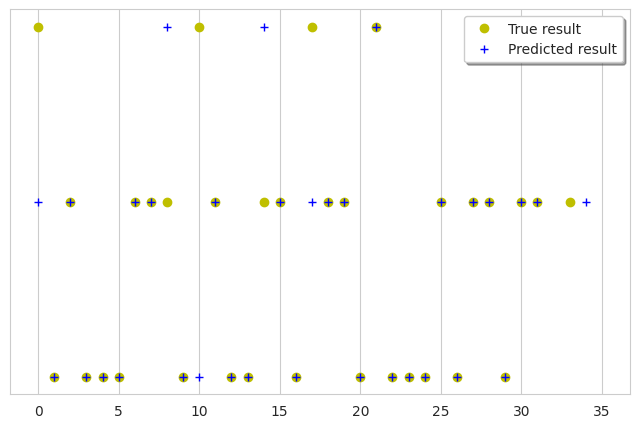

In [202]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.axes.get_yaxis().set_visible(False)
x_test_df = pd.DataFrame(x_test)
ax.plot(x_test_df.index, y_test, 'yo', label='True result')
ax.plot(x_test_df.index, knn.predict(x_test),
         'b+', label='Predicted result')
ax.legend(loc='upper right', shadow=True)

*Візуалізація точності результатів K-Nearest Neigbors*

### Далі застосуємо модель SVC. Ядрами для SVC будуть  "rbf", "linear". Задамо параметр C, який контролює трейд-офф між гладкістю вирішальної границі та правильною класифікацією точок. Де чим більше С, тим краще класифікуються точки.

In [203]:
from sklearn.svm import SVC
params = {'C': [1, 5], 'kernel': ['rbf', 'linear']}
svc = SVC(gamma='auto', probability=True)
svc_model = GridSearchCV(svc, param_grid=params)
svc_model.fit(x_train, y_train)

GridSearchCV(estimator=SVC(gamma='auto', probability=True),
             param_grid={'C': [1, 5], 'kernel': ['rbf', 'linear']})

*Тренування моделі SVM*

### Визначимо точність моделі на тренувальних та тестових даних.

In [204]:
train_score = round(svc_model.score(x_train, y_train), 5)
test_score = round(svc_model.score(x_test, y_test), 5)
results.append({'method': 'svm', 'score': train_score, 'type': 'train'})
results.append({'method': 'svm', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 1.0
Test accuracy: 0.97222


*Точність моделі SVM*

### Візуалізуємо отримані результати.

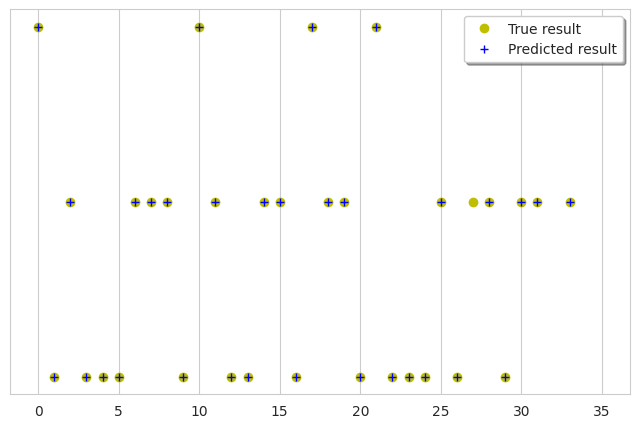

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.axes.get_yaxis().set_visible(False)
x_test_df = pd.DataFrame(x_test)
ax.plot(x_test_df.index, y_test, 'yo', label='True result')
ax.plot(x_test_df.index, svc_model.predict(x_test),
         'b+', label='Predicted result')
ax.legend(loc='upper right', shadow=True)

*Візуалізація точності результатів SVC*